In [1]:
import geopandas as gpd

In [6]:
path_to_data = 'ca-boundary/CA_State_TIGER2016.shx'
gdf = gpd.read_file(path_to_data)

In [7]:
gdf

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13..."


In [9]:
gdf['area'] = gdf.area
gdf

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13...",6.718942e+11


In [10]:
gdf['boundary'] = gdf.boundary
gdf

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,boundary
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13...",6.718942e+11,"MULTILINESTRING ((-13317677.375 3930590.808, -..."


In [11]:
gdf['centroid'] = gdf.centroid
gdf

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,boundary,centroid
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13...",6.718942e+11,"MULTILINESTRING ((-13317677.375 3930590.808, -...",POINT (-13328609.684 4488027.644)


<AxesSubplot:>

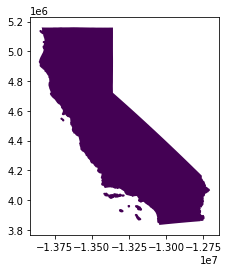

In [14]:
gdf.plot('area')

In [16]:
# Creates an interactive map
gdf.explore('area')

/Users/Isaacbolo/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


<AxesSubplot:>

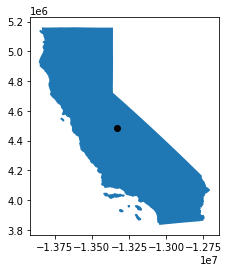

In [19]:
ax = gdf['geometry'].plot()
gdf['centroid'].plot(ax=ax, color='black')

In [22]:
gdf.crs

<Derived Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

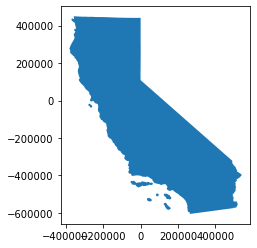

In [24]:
gdf = gdf.set_geometry('geometry')
transform = gdf.to_crs("EPSG:3309")
transform.plot()

In [25]:
gdf_wm = gdf.to_crs(epsg=3857)

In [27]:
import contextily as cx

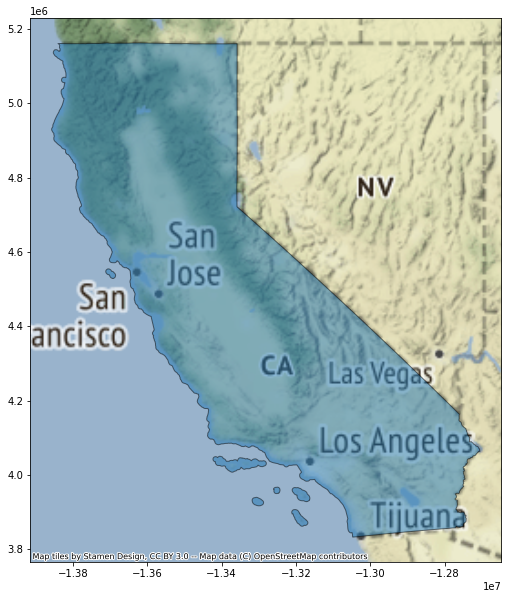

In [37]:
# Add background map to plot
ax = gdf_wm.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, zoom=5)